In [1]:
#BLUEPRINT NOTEBOOK FOR EDS DATA ANALYSIS

In [2]:
%matplotlib notebook

In [3]:
import hyperspy.api as hs
import os
from hyperspy.drawing._widgets.scalebar import ScaleBar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
import matplotlib
import matplotlib.patches as patches
import scipy.misc

In [4]:
#File paths for Troilite measurements, from November only 
#Day2
    #C:/Users/nt229/Jupyter/Diamond_Data/DLS_2022-11-22_14-50-20/mg31953-4/raw/raw/Troilite_EDX_EELS/Troilite_1
    #C:/Users/nt229/Jupyter/Diamond_Data/DLS_2022-11-22_14-50-20/mg31953-4/raw/raw/Troilite_EDX_EELS/Troilite_1a
#Day1
    #C:/Users/nt229/Jupyter/Diamond_Data/DLS_2022-11-22_14-50-20/mg31953-3/raw/raw/Troilite_grid_a4/Troilite_1
    #C:/Users/nt229/Jupyter/Diamond_Data/DLS_2022-11-22_14-50-20/mg31953-3/raw/raw/Troilite_grid_a4/Troilite_2
    #C:/Users/nt229/Jupyter/Diamond_Data/DLS_2022-11-22_14-50-20/mg31953-3/raw/raw/Troilite_grid_a4/Troilite_3
    

In [10]:
#print file list in path fn
fn = 'C:/Users/nt229/Jupyter/Diamond_Data/DLS_2022-11-22_14-50-20/mg31953-3/raw/raw/Troilite_grid_a4/Troilite_3/'
file_list = os.listdir(fn)
n =0
for this_file in file_list:
    print(n , this_file)
    n+=1

0 (5) Spectrum of EDS Spectrum Image.dm4
1 BF Image.dm4
2 EDS Spectrum Image.dm4
3 HAADF Image (SI Survey).dm4
4 HAADF Image.dm4


In [11]:
#Load HAADF images, EDS

# Name images
HAADF_fn_SI = fn + file_list[3] #SI Survey
HAADF_fn = fn + file_list[4] #HAADF image

# Load images
HAADF_SI = hs.load(HAADF_fn_SI)
HAADF = hs.load(HAADF_fn)

# Name EDS spectrum
SI_fn = fn +file_list[2]

#Load EDS spectra
SI = hs.load(SI_fn)

In [12]:
SI

<EDSTEMSpectrum, title: EDS Spectrum Image, dimensions: (30, 30|2048)>

In [13]:
SI.metadata.Acquisition_instrument.TEM

├── Detector
│   └── EDS
│       ├── azimuth_angle = 0.0
│       ├── elevation_angle = 40.0
│       └── energy_resolution_MnKa = 130.0
├── Stage
│   ├── tilt_alpha = 9.039999961853027
│   ├── tilt_beta = 4.079999923706055
│   ├── x = -0.123756703125
│   ├── y = 0.14854440625
│   └── z = 0.051299
├── acquisition_mode = STEM
├── beam_current = 0.0
├── beam_energy = 200.0
├── camera_length = 30.0
├── magnification = 150000.0
└── microscope = JEM-ARM200F

<IPython.core.display.Javascript object>


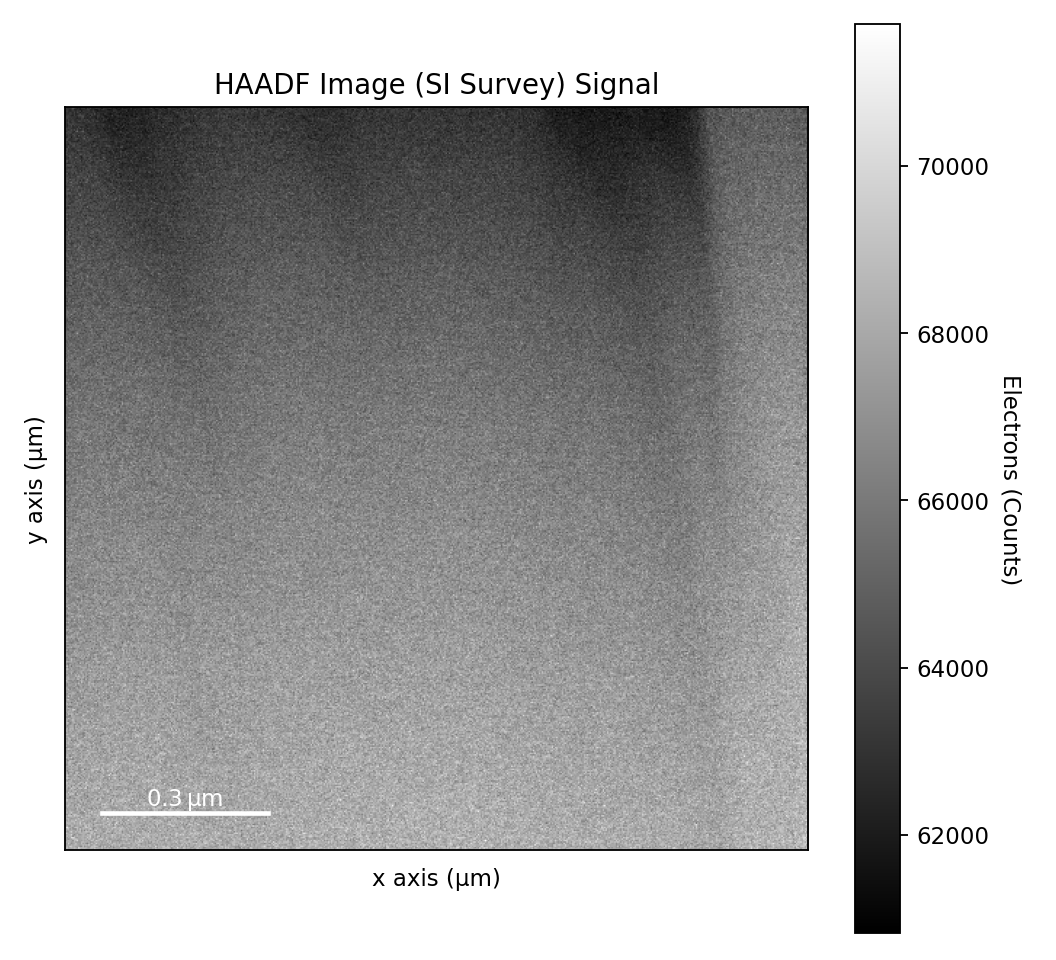

In [14]:
# Plot images
HAADF_SI.plot()
#HAADF.plot()

<IPython.core.display.Javascript object>


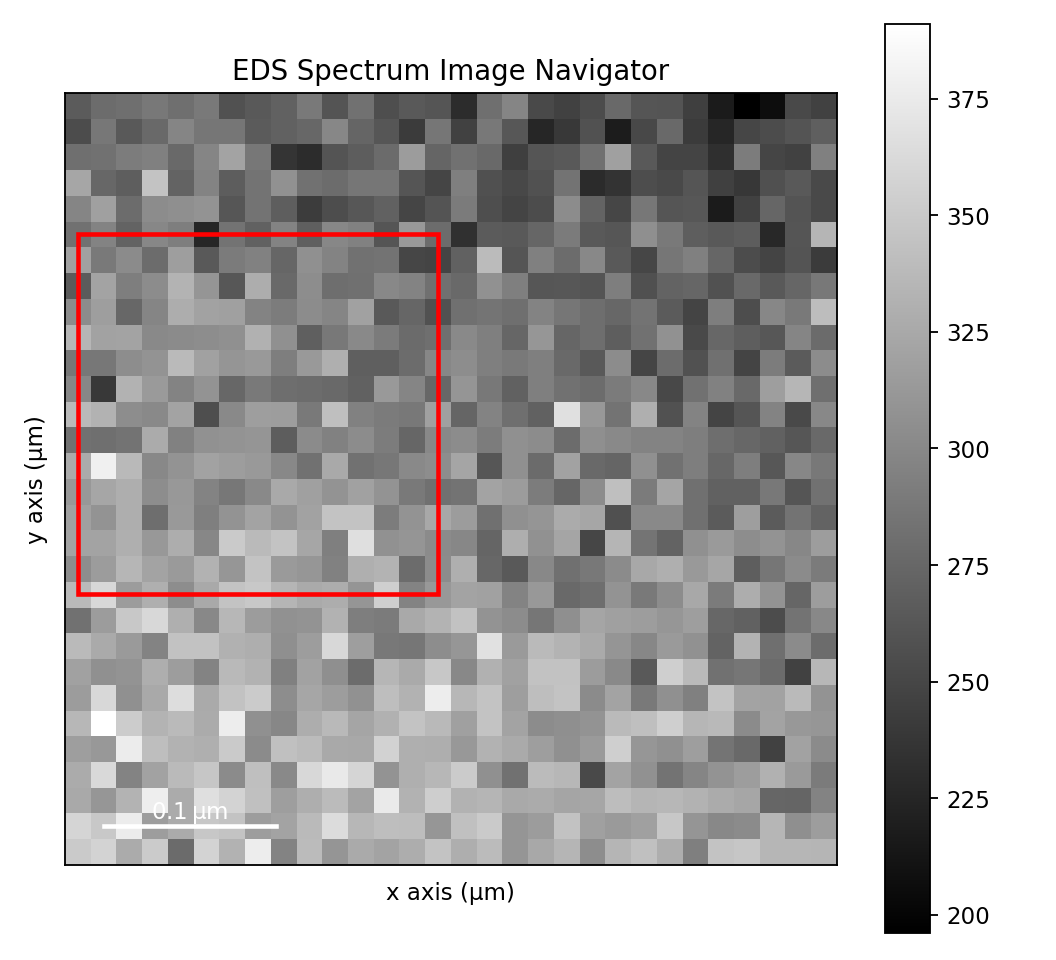

<IPython.core.display.Javascript object>


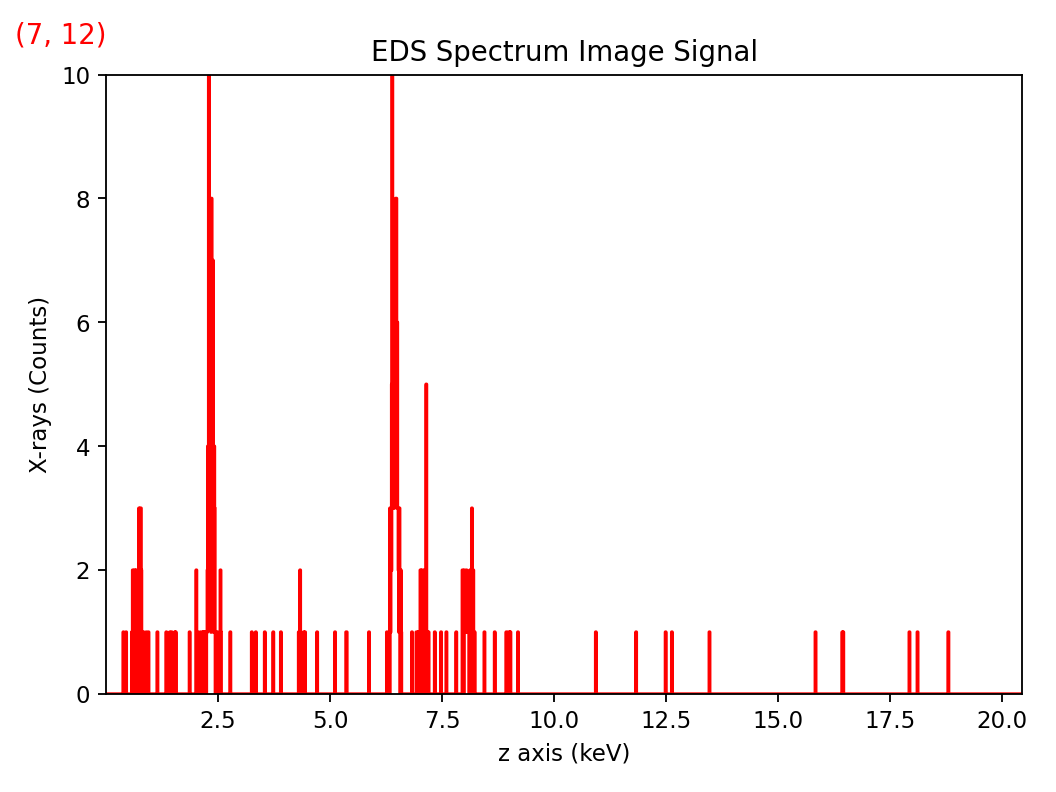

In [15]:
SI.plot()

In [16]:
SI.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 40.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   ├── tilt_alpha = 9.039999961853027
│       │   ├── tilt_beta = 4.079999923706055
│       │   ├── x = -0.123756703125
│       │   ├── y = 0.14854440625
│       │   └── z = 0.051299
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 30.0
│       ├── magnification = 150000.0
│       └── microscope = JEM-ARM200F
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2023-05-26T09:27:56.829541+01:00
│   ├── authors = MES
│   ├── date = 2022-11-18
│   ├── original_filename = EDS Spectrum Image.dm4
│   ├── time = 14:53:11
│   └── title = EDS Spectrum Image
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = X-rays (Counts)
    └── signal_type = EDS_TEM

<IPython.core.display.Javascript object>


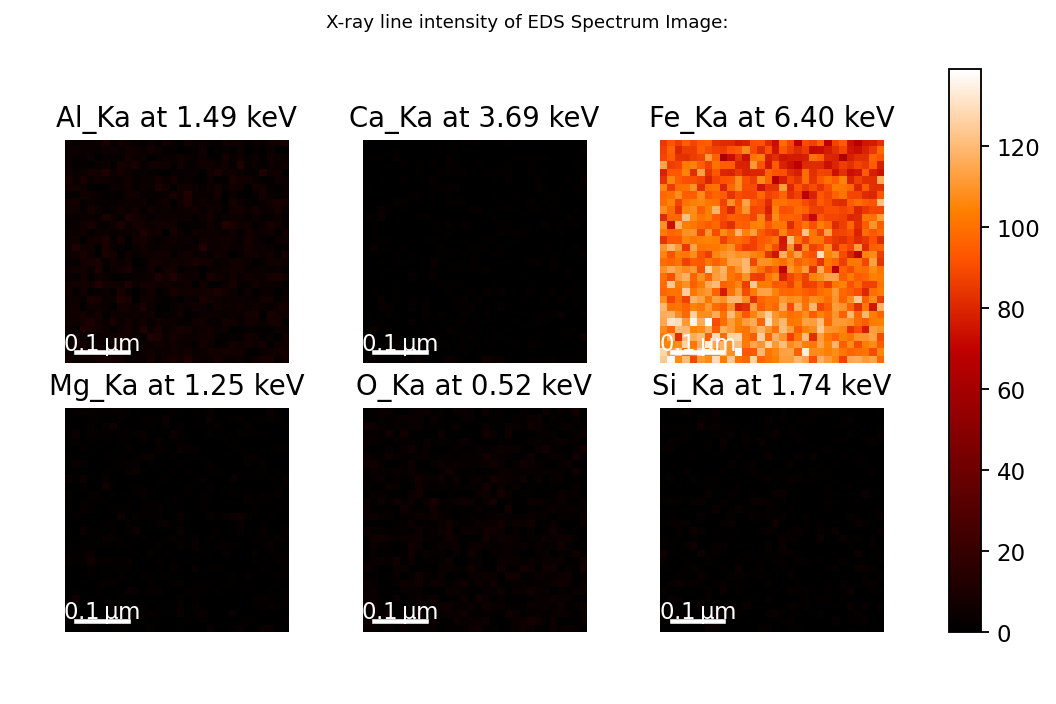

C:\Users\nt229\AppData\Local\hyperspy-bundle\lib\site-packages\hyperspy\drawing\utils.py:1191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


<IPython.core.display.Javascript object>


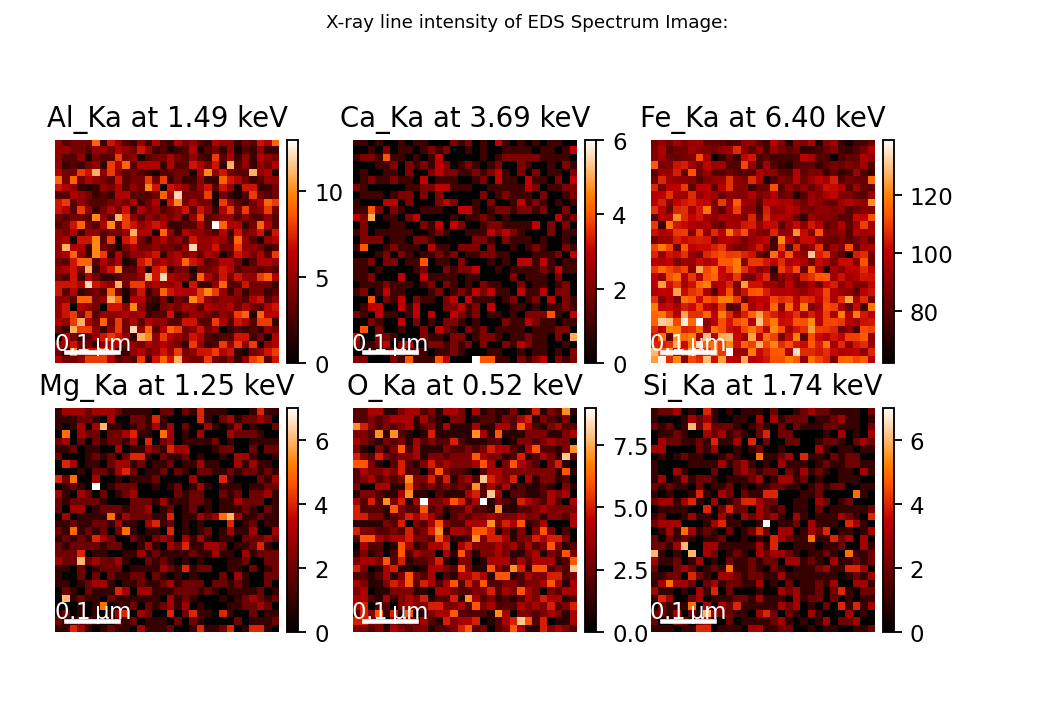

<IPython.core.display.Javascript object>


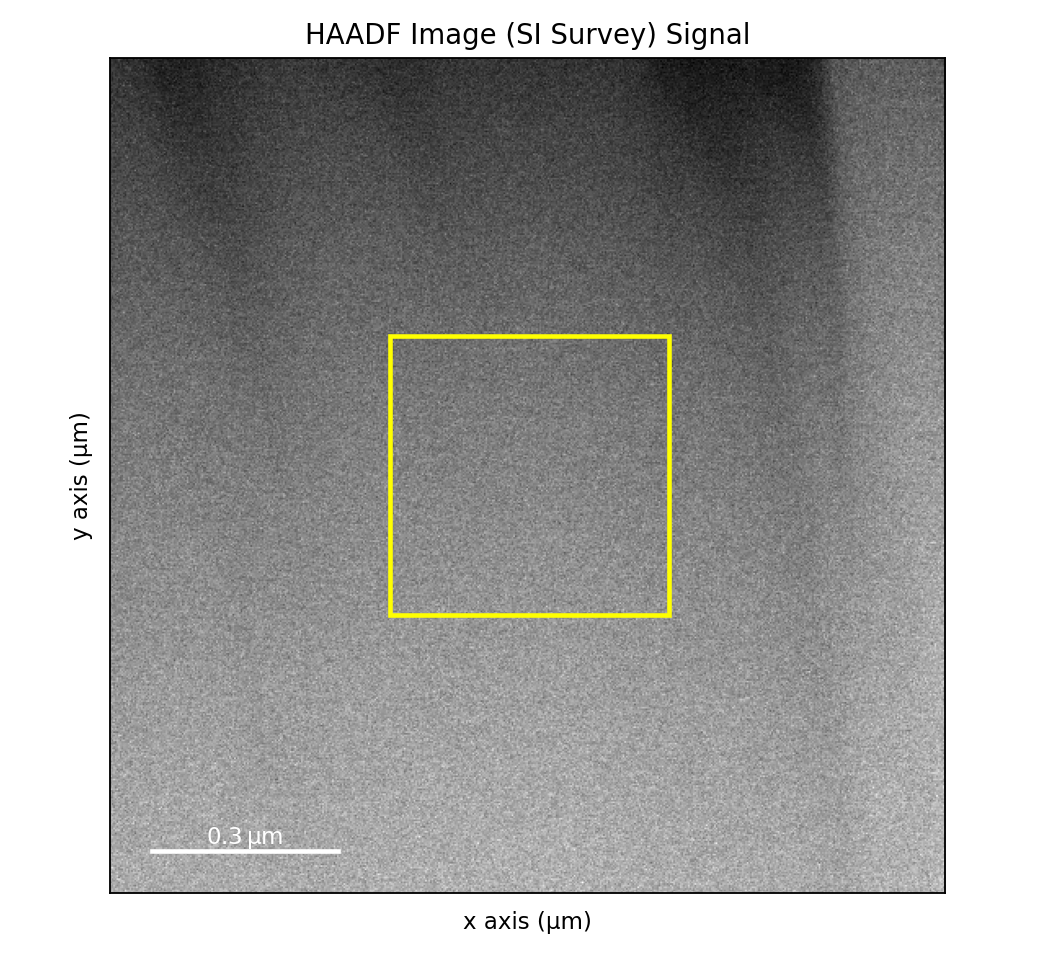

In [17]:
#eds maps - single colorbar
eds_maps = SI.get_lines_intensity(['Al_Ka', 'Ca_Ka', 'Fe_Ka', 'Mg_Ka', 'O_Ka', 'Si_Ka']) #'Ti_Ka'
hs.plot.plot_images(eds_maps, axes_decor = 'off', scalebar = 'all',
    tight_layout = True, cmap = 'gist_heat',
    colorbar = 'single',  
    scalebar_color = 'w', suptitle_fontsize = 8,
    padding={'top':0.8, 'bottom':0.10, 'left':0.05,
            'right':0.85, 'wspace':0.20, 'hspace':0.20});

#eds maps - multiple colorbar
eds_maps = SI.get_lines_intensity(['Al_Ka', 'Ca_Ka', 'Fe_Ka', 'Mg_Ka', 'O_Ka', 'Si_Ka']) #'Ti_Ka'
hs.plot.plot_images(eds_maps, axes_decor = 'off', scalebar = 'all',
    tight_layout = True, cmap = ['gist_heat'],
    colorbar = 'multi',  
    scalebar_color = 'w', suptitle_fontsize = 8,
    padding={'top':0.8, 'bottom':0.10, 'left':0.05,
            'right':0.85, 'wspace':0.20, 'hspace':0.20});

ax_maps = plt.gca();
#ax_maps.set_title('')
#fig4_caption="EDX spectrum images";
#txt = plt.figtext(0.5, 0.000, fig4_caption, wrap=True, horizontalalignment='center', fontsize=12);

#plt.savefig('', dpi = 300) #set folder for save

#Print HAADFs images

survey_fig = HAADF_SI.plot(colorbar = False, )

#get SI region
SI_area = SI.original_metadata['ImageList']['TagGroup0']['ImageTags']['SI']['Acquisition']['Survey Image']['Spectrum Image Rect']
#print(si_area)
#convert from px to nm
SI_area = tuple([HAADF_SI.axes_manager['x'].scale*x for x in SI_area])
#print(si_area)
#define marker on survey scan
m = hs.plot.markers.rectangle(x1= SI_area[1], y1= SI_area[0], x2= SI_area[3], y2= SI_area[2],
                                  color='yellow', linewidth = 2)
#add marker
s = HAADF_SI.add_marker(m)

<IPython.core.display.Javascript object>


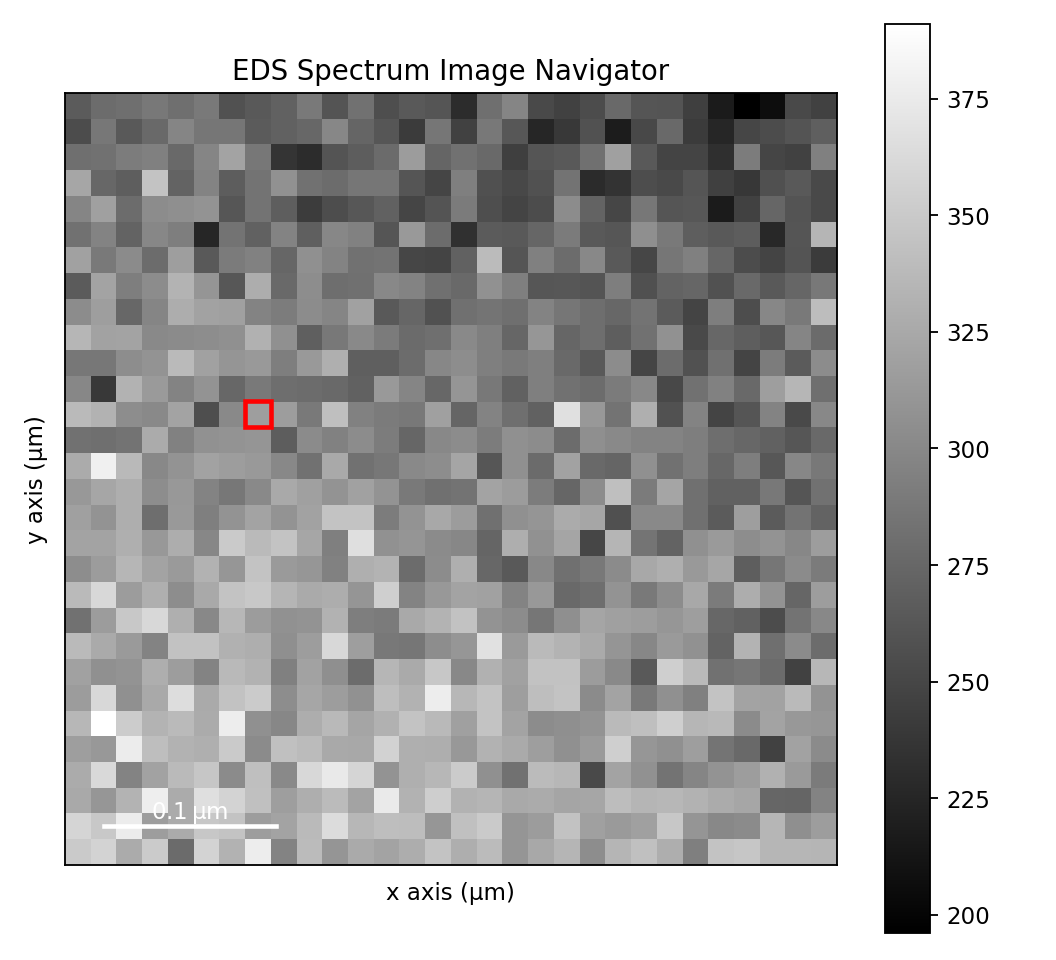

<IPython.core.display.Javascript object>


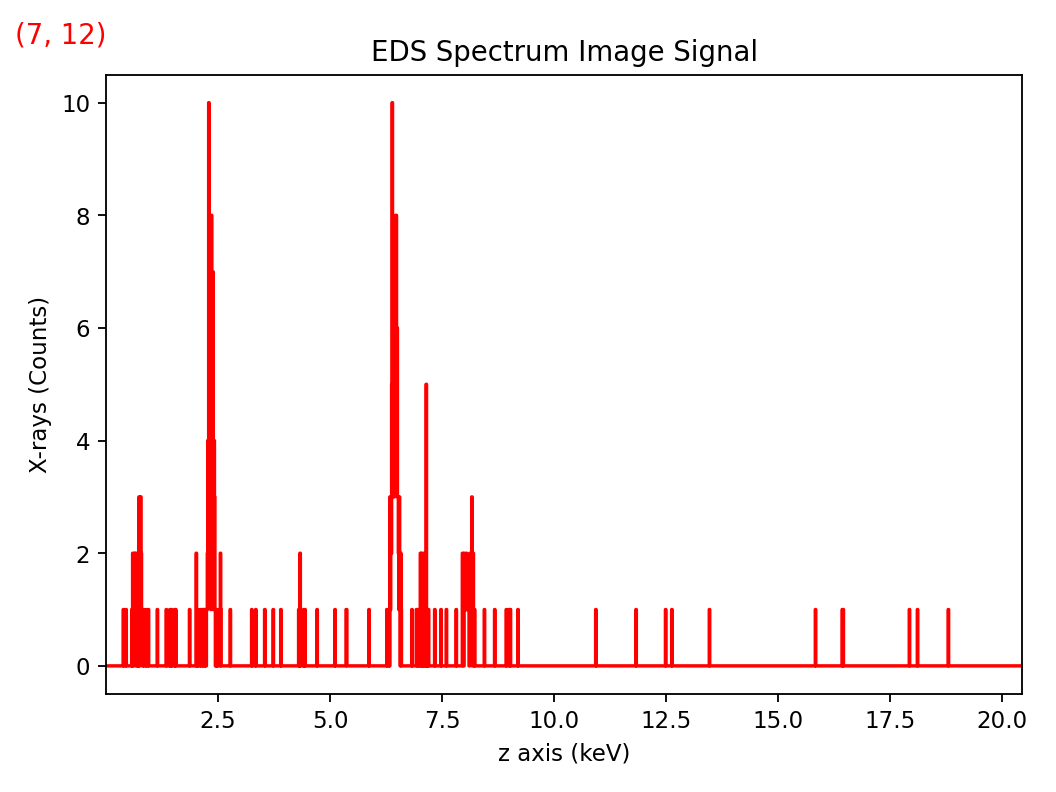

In [18]:
SI.plot()

<IPython.core.display.Javascript object>


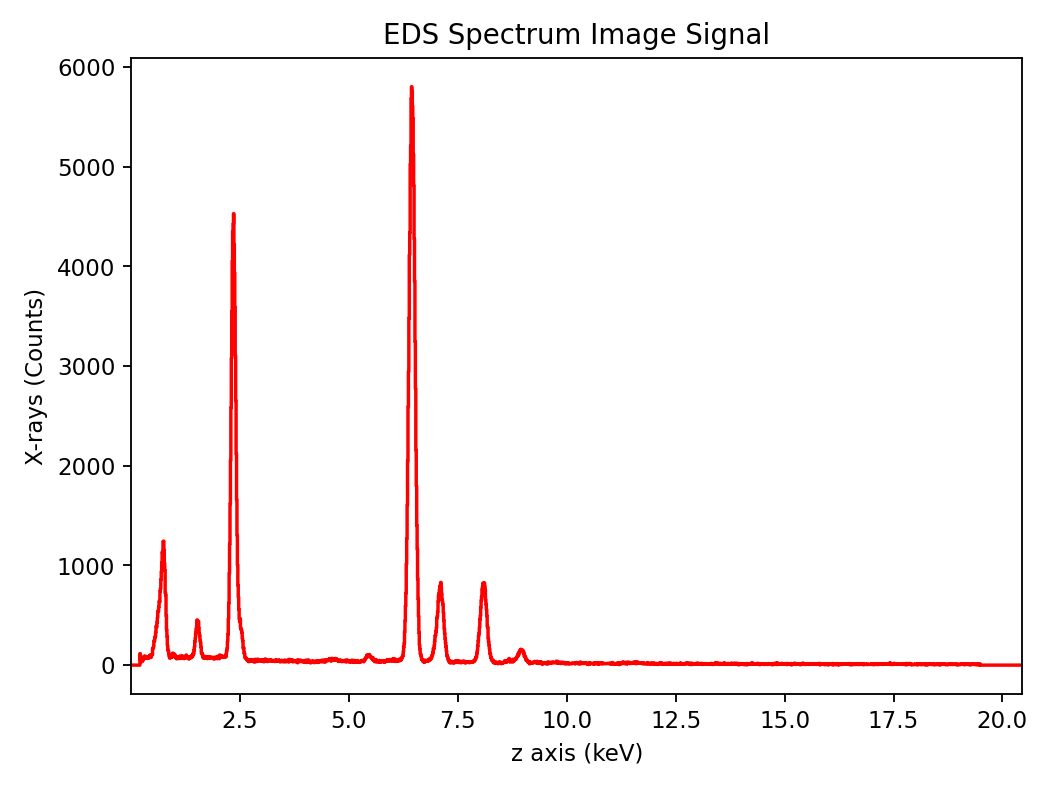

In [19]:
#SI_set_elements([])
#SI_set_lines([])
#SI_add_elements(['Fe', 'Si', 'Mg', 'O', 'Mn', 'Ca'])
#SI_add_lines()

SI_sum = SI.sum()
SI_sum.plot()

<IPython.core.display.Javascript object>


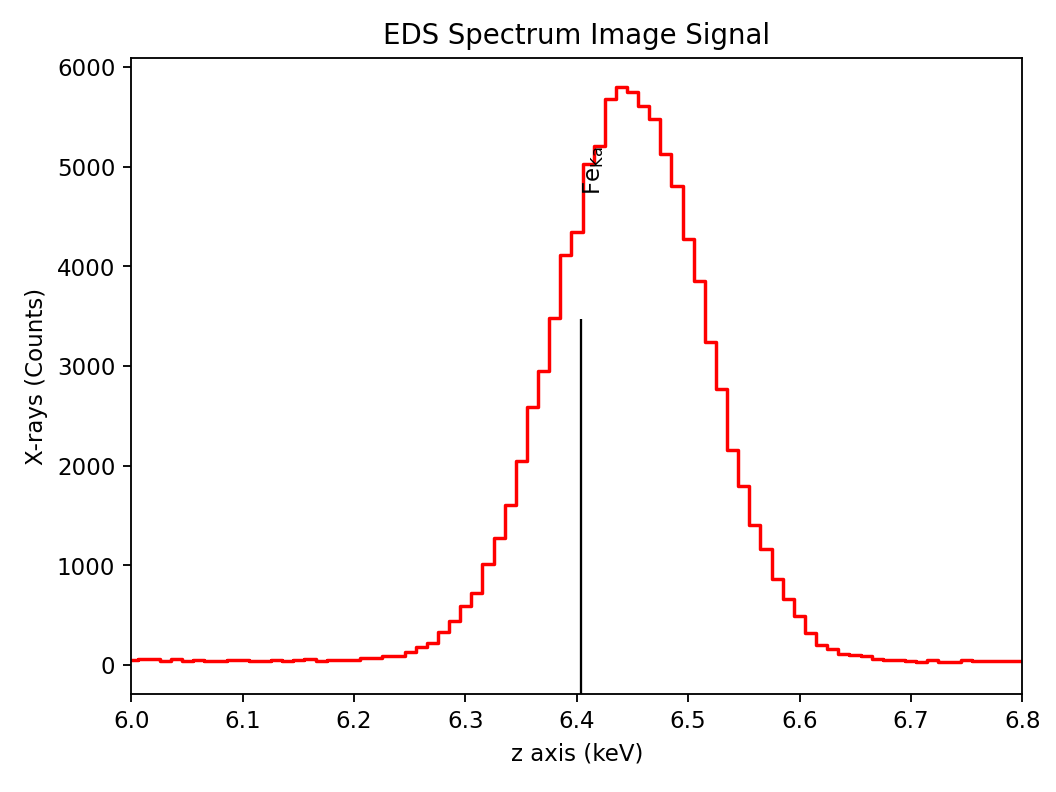

(6.0, 6.8)

In [20]:
SI_sum.add_elements(['Fe'])
SI_sum.add_lines(['Fe_Ka'])
SI_sum.plot(True)
plt.xlim([6.0, 6.8])
#plt.ylim([0, 500])

<IPython.core.display.Javascript object>


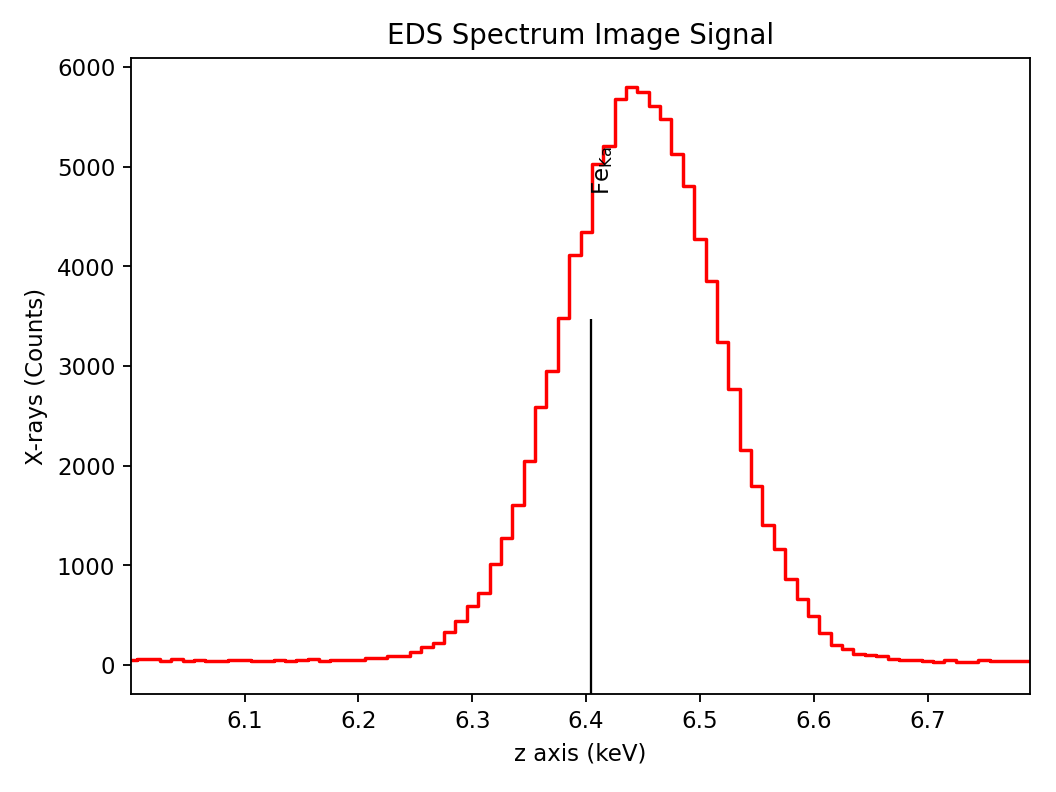

C:\Users\nt229\AppData\Local\Temp\ipykernel_16428\1078485059.py:5: DeprecationWarning: use "HasTraits.trait_get" instead
  real_Fe_pos = m_Fe.components.Fe_Ka.centre.get()['value'] # get expected Fe position


In [21]:
#fit to Fe peak
SI_sum_Fe = SI_sum.isig[6.0:6.8]
SI_sum_Fe.plot(True)
m_Fe = SI_sum_Fe.create_model()
real_Fe_pos = m_Fe.components.Fe_Ka.centre.get()['value'] # get expected Fe position
m_Fe.fix_background() # set background to zero
m_Fe.free_xray_lines_energy()
m_Fe.free_xray_lines_width
results = m_Fe.fit()

<IPython.core.display.Javascript object>


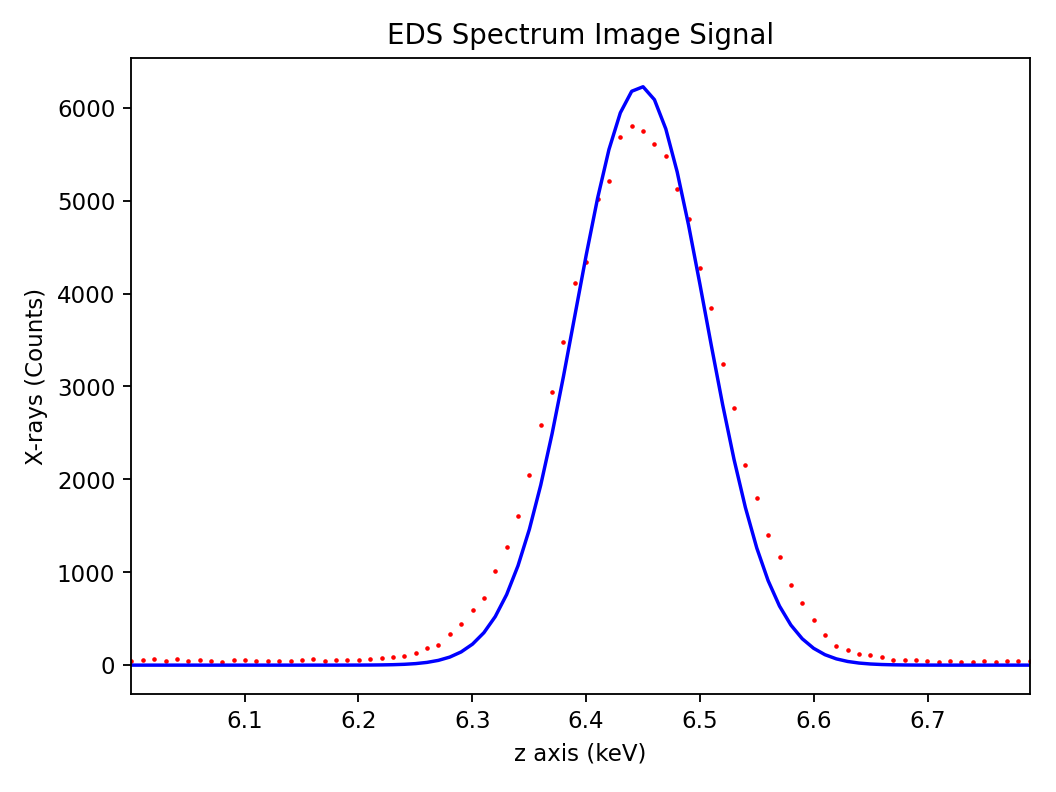

expected Fe pos :  6.4039
measured Fe pos :  6.447631600270561
offset :  -0.043731600270560556


C:\Users\nt229\AppData\Local\Temp\ipykernel_16428\414576397.py:2: DeprecationWarning: use "HasTraits.trait_get" instead
  meas_Fe_pos = m_Fe.components.Fe_Ka.centre.get()['value']#get measured Fe position


In [22]:
m_Fe.plot()
meas_Fe_pos = m_Fe.components.Fe_Ka.centre.get()['value']#get measured Fe position
print('expected Fe pos : ' , real_Fe_pos)
print('measured Fe pos : ' , meas_Fe_pos)
offset_Fe =  real_Fe_pos - meas_Fe_pos 
print('offset : ' ,offset_Fe)

<IPython.core.display.Javascript object>


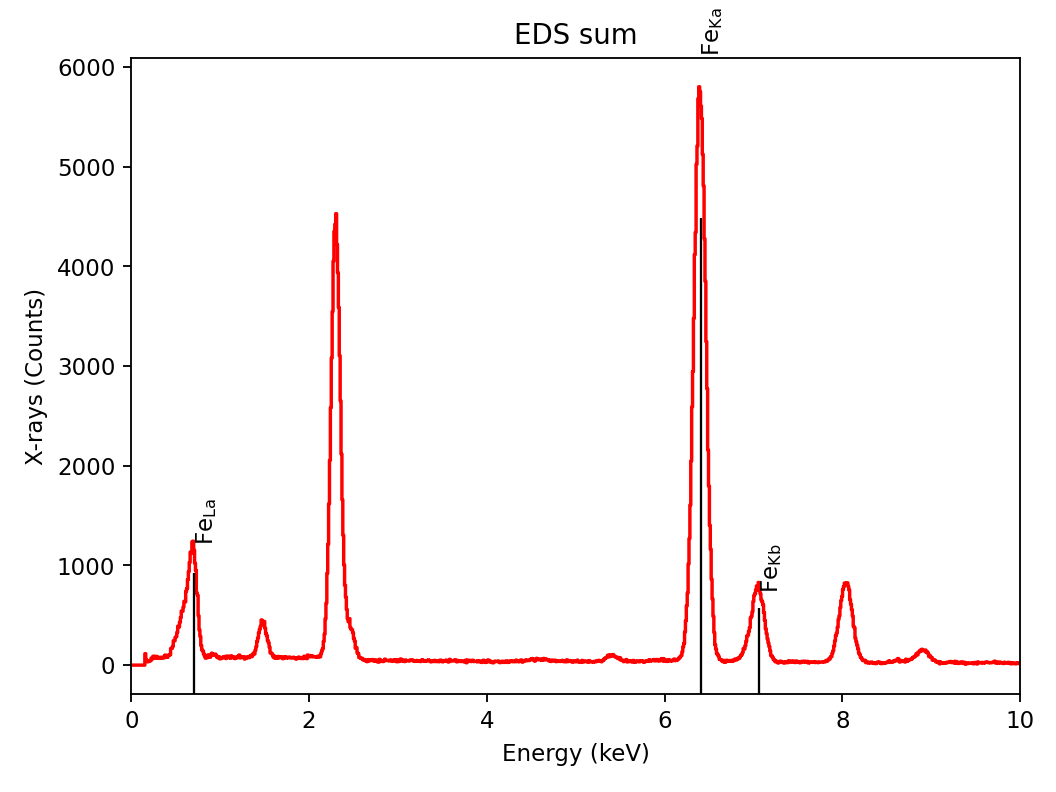

Text(29.222222222222214, 0.5, 'X-rays (Counts)')

In [23]:
#set offset to data and check
#set offset to full data 
SI.axes_manager[-1].offset = offset_Fe
SI_sum = SI.sum()
SI_sum.add_elements(['Fe'])
SI_sum.plot(True)

#Axis management
ax_spec = plt.gca()

ax_spec.set_xlim([0.0, 10.0])
ax_spec.set_title('EDS sum')
ax_spec.set_xlabel('Energy (keV)')
ax_spec.set_ylabel('X-rays (Counts)')

In [24]:
#find peaks, play with parameters to get good output
P = SI_sum.find_peaks1D_ohaver(amp_thresh= 15,medfilt_radius=21, maxpeakn=40)[0]
peak_list = []
for this_P in P:
    #print(this_P['position'])
    peak_list.append(hs.eds.get_xray_lines_near_energy(this_P['position'],width = 0.1,  only_lines=['Ka', 'Kb']),)
    print(this_P, ' : ', peak_list[-1])

[########################################] | 100% Completed | 116.10 ms
(0.68742095, 21.87206226, 0.18380856)  :  ['F_Ka']
(0.97029374, 6.427169, nan)  :  []
(1.00103976, 6.25089777, nan)  :  ['Na_Ka']
(1.15885243, 6.54437879, nan)  :  []
(1.46221327, 14.18251458, 0.24392682)  :  ['Al_Ka']
(1.6689584, 6.70555745, 0.27254804)  :  []
(1.69937139, 6.82066654, 0.8739489)  :  ['Si_Ka']
(1.82542782, 6.49263419, nan)  :  ['Si_Kb']
(1.85240833, 6.33466748, nan)  :  ['Si_Kb']
(2.29631719, 38.49096533, 0.19722819)  :  ['S_Ka']
(2.60898263, 5.93431155, 2.22524452)  :  ['Cl_Ka']
(2.71508678, 5.39382627, 0.42679685)  :  []
(2.93860146, 5.38942328, 0.2493761)  :  ['Ar_Ka']
(2.99495487, 5.1212863, nan)  :  ['Ar_Ka']
(3.30057226, 5.23391544, 0.76342506)  :  ['K_Ka']
(3.30699356, 5.0619271, nan)  :  ['K_Ka']
(3.58105616, 5.09270096, nan)  :  ['K_Kb']
(3.61607008, 5.38803305, 0.23235853)  :  ['K_Kb']
(3.65439439, 5.03798054, 0.58275981)  :  ['Ca_Ka']
(3.82231852, 5.23709697, 0.21237647)  :  []
(3.894030

C:\Users\nt229\AppData\Local\hyperspy-bundle\lib\site-packages\scipy\signal\_signaltools.py:1545: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '


In [25]:
#clear peaks 
SI_sum.metadata['Sample']['elements'] = []
SI_sum.metadata['Sample'][' xray_lines '] = []

<IPython.core.display.Javascript object>


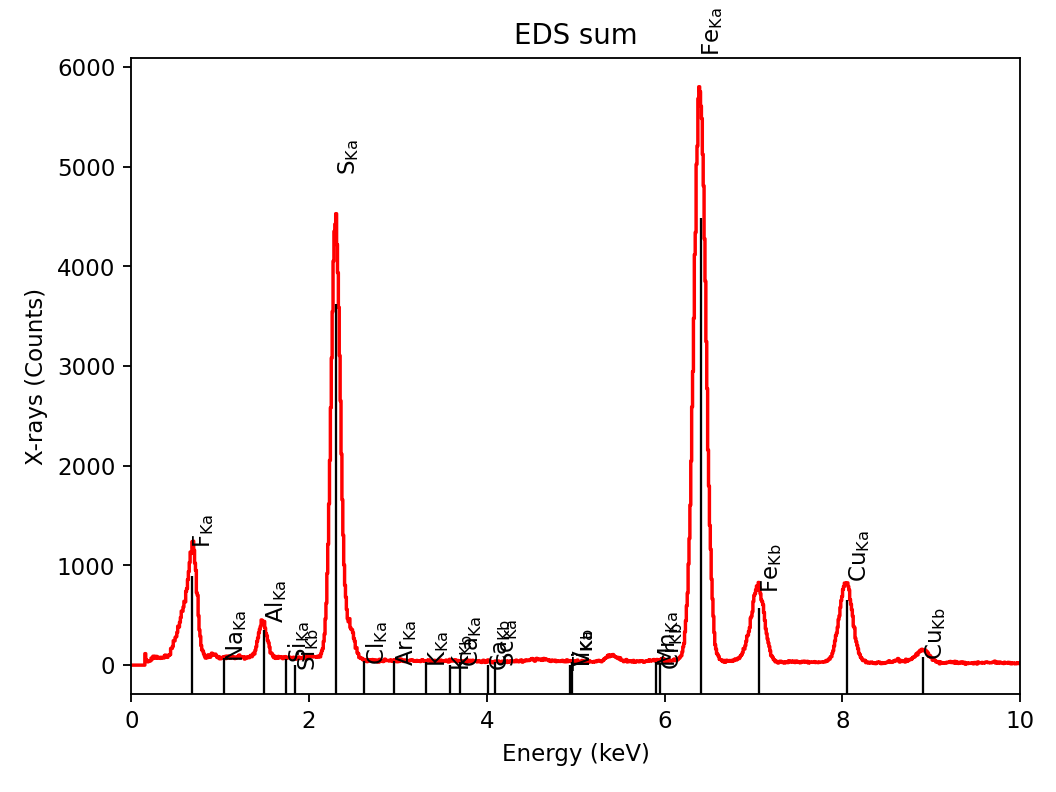

Text(29.222222222222214, 0.5, 'X-rays (Counts)')

In [26]:
#add lines to SI_sum object
for these_peaks in peak_list:
    #print(these_peaks)
    SI_sum.add_lines(these_peaks)
SI_sum.plot(True)

ax_spec = plt.gca()

ax_spec.set_xlim([0.0, 10.0])
ax_spec.set_title('EDS sum')
ax_spec.set_xlabel('Energy (keV)')
ax_spec.set_ylabel('X-rays (Counts)')

In [41]:
SI.set_elements([])
SI.set_lines([])
SI.add_elements(['Fe', 'S', 'Cr', 'Ti', 'Mn', 'C', 'Al'])

SI.add_lines()

In [42]:
SI.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 40.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   ├── tilt_alpha = 9.039999961853027
│       │   ├── tilt_beta = 4.079999923706055
│       │   ├── x = -0.123756703125
│       │   ├── y = 0.14854440625
│       │   └── z = 0.051299
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 30.0
│       ├── magnification = 150000.0
│       └── microscope = JEM-ARM200F
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2023-05-26T09:27:56.829541+01:00
│   ├── authors = MES
│   ├── date = 2022-11-18
│   ├── original_filename = EDS Spectrum Image.dm4
│   ├── time = 14:53:11
│   └── title = EDS Spectrum Image
├── Sample
│   ├── elements = ['Al', 'C', 'Cr', 'Fe', 'Mn', 'S', 'Ti']
│   └── xray_lines = ['Al_Ka', 'C_Ka', 'Cr_Ka', 'Fe_Ka', 'Mn_Ka', 'S_Ka', 'Ti_Ka']
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = X-rays (Counts)
    └── signal_type = EDS_TEM

In [43]:
m = SI.sum().isig[0.0:10.0].create_model()
m.add_family_lines(['Cu_Ka', 'Al_Ka', 'C_Ka', 'F_Ka', 'Na_Ka', 'Cr_Ka', 'O_Ka', 'Ca_Ka', 'Mn_Ka']) #included in curve fitting but not in the final quantification

In [44]:
m.xray_lines
print (m.xray_lines)

[<Al_Ka (Gaussian component)>, <C_Ka (Gaussian component)>, <Cr_Ka (Gaussian component)>, <Cr_La (Gaussian component)>, <Fe_Ka (Gaussian component)>, <Fe_La (Gaussian component)>, <Mn_Ka (Gaussian component)>, <Mn_La (Gaussian component)>, <S_Ka (Gaussian component)>, <Ti_Ka (Gaussian component)>, <Ti_La (Gaussian component)>, <Cu_Ka (Gaussian component)>, <F_Ka (Gaussian component)>, <Na_Ka (Gaussian component)>, <O_Ka (Gaussian component)>, <Ca_Ka (Gaussian component)>]


In [45]:
m.fit()

   covar: array([[ 5.73515994e+02, -1.24049420e+03,  8.83684155e+02,
        -2.85460346e+02,  4.60631043e+01, -3.62162372e+00,
         1.10509545e-01,  6.43670242e+00, -2.34275127e+01,
         5.36592281e+00, -4.00957882e+00,  2.06502664e+00,
        -3.57081663e+00,  4.54618491e+00, -3.24065353e+00,
         6.65227850e-01,  1.00267260e+00, -9.73161457e+00,
        -3.85454029e+00, -5.51132592e-01,  3.33143794e+00,
        -2.45143132e+00, -4.61285505e+00],
       [-1.24049420e+03,  4.31603359e+03, -3.70021482e+03,
         1.31970379e+03, -2.26443939e+02,  1.85631734e+01,
        -5.83832075e-01, -4.12632706e+01,  2.42950242e+01,
        -3.54477207e+01, -7.01284947e+00, -8.69388311e+00,
        -3.43371584e+01, -2.64549068e+01, -7.72684216e+00,
         9.29639042e+00, -1.37895413e+01,  3.78166268e-01,
         2.26404659e+01,  2.21893437e+00, -5.02693788e+01,
        -4.41301820e+00,  2.44498346e+01],
       [ 8.83684155e+02, -3.70021482e+03,  3.41731694e+03,
        -1.27304321

In [46]:
m.fit_background(start_energy=0.0, end_energy=10.0)

In [47]:
m.calibrate_energy_axis(calibrate='resolution', xray_lines=['Fe_Ka', 'S_Ka'])

In [48]:
m.calibrate_energy_axis(calibrate='offset', xray_lines=['Fe_Ka', 'S_Ka'])

In [49]:
print(SI.metadata.Acquisition_instrument.TEM.Detector.EDS.energy_resolution_MnKa)

130.0


In [50]:
m.calibrate_xray_lines(xray_lines=['Fe_Ka'])

In [51]:
m.multifit(iterpath="serpentine")

<IPython.core.display.Javascript object>


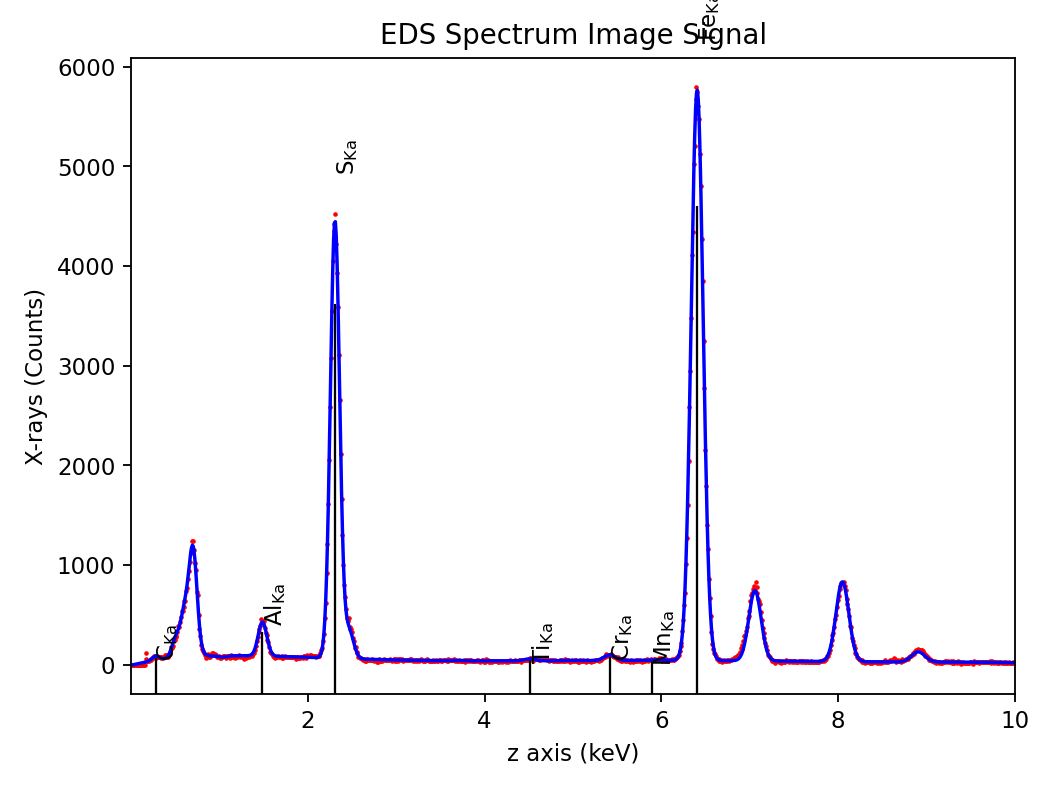

In [52]:
m.plot(xray_lines = True)

In [54]:
intensity = m.get_lines_intensity( xray_lines = ('Fe_Ka', 'S_Ka', 'Ti_Ka', 'Cr_Ka', 'Al_Ka'), plot_result = True )

Fe_Ka at 6.4039 keV : Intensity = 97052.57
S_Ka at 2.3072 keV : Intensity = 57403.29
Ti_Ka at 4.5109 keV : Intensity = 308.42
Cr_Ka at 5.4147 keV : Intensity = 890.19
Al_Ka at 1.4865 keV : Intensity = 4137.88


In [55]:
intensity

[<BaseSignal, title: Intensity of Fe_Ka at 6.40 keV from EDS Spectrum Image, dimensions: (1|)>,
 <BaseSignal, title: Intensity of S_Ka at 2.31 keV from EDS Spectrum Image, dimensions: (1|)>,
 <BaseSignal, title: Intensity of Ti_Ka at 4.51 keV from EDS Spectrum Image, dimensions: (1|)>,
 <BaseSignal, title: Intensity of Cr_Ka at 5.41 keV from EDS Spectrum Image, dimensions: (1|)>,
 <BaseSignal, title: Intensity of Al_Ka at 1.49 keV from EDS Spectrum Image, dimensions: (1|)>]

In [57]:
#Quantification
#imput K factors corresponding to elements in SI and calculate atomic percent 
#kfactors = [0.74, 0.99, 1.0, 1.1, 1.0] 

kfactors = [ 1.0 ,0.82, 1.08, 1.0, 0.82]

#kfactors = [1.0, 0.92, 1.2, 0.84, 1.0, 1.1, 0.8]
#kfactors = [0.91, 0.99, 0.97, 1.0, 0.85]
atomic_percent = SI.sum().quantification(intensities= intensity, method='CL',
                                  factors=kfactors)

[########################################] | 100% Completed | 122.15 ms


In [58]:
#print the total atomic percent over the whole image/region
sum_atomic_percent = []
for this_atom in atomic_percent:
    print(this_atom.metadata['General']['title'], ':',  this_atom.mean().data[0])
    sum_atomic_percent.append(this_atom.mean().data[0])

atomic percent of Fe : 51.789196697586725
atomic percent of S : 43.74574761122117
atomic percent of Ti : 0.20736851368120024
atomic percent of Cr : 0.5101868418470393
atomic percent of Al : 3.747500335663867


In [59]:
#print (sum_atomic_percent[(3)]/sum_atomic_percent[(4)]) #PYROXENE Si O3
                                                        #OLIVINE Si 04

In [60]:
#add all to check is equal to 100
sum(sum_atomic_percent)

100.00000000000001

In [61]:
weight_percent = SI.sum().quantification(intensities=intensity, method='CL',
                                  factors=kfactors, composition_units='weight')

#print the total weight percent over the whole image
sum_weight_percent = []
for this_atom in weight_percent:
    print(this_atom.metadata['General']['title'], ':',  this_atom.mean().data[0])
    sum_weight_percent.append(this_atom.mean().data[0])

weight percent of Fe : 65.24998023239095
weight percent of S : 31.64637730584336
weight percent of Ti : 0.22394219919005393
weight percent of Cr : 0.5984900552063185
weight percent of Al : 2.2812102073693175


In [62]:
sum(sum_weight_percent)

99.99999999999999

In [147]:
#calculating cation ratios
#calculating Mg number (cation ratio)
Mg_ratio = (sum_atomic_percent [(2)]/(sum_atomic_percent [(0)]+sum_atomic_percent [(1)]
                                      + sum_atomic_percent [(2)]))*100

#calculating Fe number (cation ratio)
Fe_ratio = (sum_atomic_percent [(1)]/(sum_atomic_percent [(0)]+sum_atomic_percent [(1)]
                                      + sum_atomic_percent [(2)]))*100

#calculating Ca number (cation ratio)
Ca_ratio = (sum_atomic_percent [(0)]/(sum_atomic_percent [(0)]+sum_atomic_percent [(1)]
                                      + sum_atomic_percent [(2)]))*100


print('Mg ratio :' , Mg_ratio, ',', 
      'Fe ratio :', Fe_ratio, ',', 
      'Ca ratio :', Ca_ratio)

Mg ratio : 0.18765965286336186 , Fe ratio : 57.460755162815346 , Ca ratio : 42.3515851843213


In [67]:
Mg_number = (sum_atomic_percent [(2)]/(sum_atomic_percent [(1)]
                                      + sum_atomic_percent [(2)]))*100
print('Mg number :' , Mg_number)

Mg number : 0.40612825170680084
